# Importing Dependencies and Dataset

In [146]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import rcParams
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection  import train_test_split
from sklearn.metrics import mean_squared_error
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [110]:
df = pd.read_csv('/content/drive/MyDrive/Datasets/weatherHistory.csv')

# Check Statistics

In [111]:
df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  float64
 8   Visibility (km)           96453 non-null  float64
 9   Loud Cover                96453 non-null  float64
 10  Pressure (millibars)      96453 non-null  float64
 11  Daily Summary             96453 non-null  object 
dtypes: float64(8), object(4)
memory usage: 8.8+ MB


In [113]:
df.describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.0,96453.000000
mean,11.932678,10.855029,0.734899,10.810640,187.509232,10.347325,0.0,1003.235956
std,9.551546,10.696847,0.195473,6.913571,107.383428,4.192123,0.0,116.969906
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,4.688889,2.311111,0.600000,5.828200,116.000000,8.339800,0.0,1011.900000
50%,12.000000,12.000000,0.780000,9.965900,180.000000,10.046400,0.0,1016.450000
75%,18.838889,18.838889,0.890000,14.135800,290.000000,14.812000,0.0,1021.090000
max,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,0.0,1046.380000


# Exploratory Data Analysis

## Getting list of numeric and categorical column

In [114]:
numeric_col = df.select_dtypes(include='float64').columns
categorical_col = df.select_dtypes(include='object').columns

## Checking Histograms and Skewness of Dependent Variable

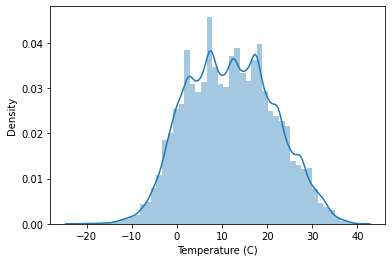

In [115]:
sns.distplot(df['Temperature (C)'])

In [116]:
#skewness and kurtosis
print("Skewness: %f" % df['Temperature (C)'].skew())
print("Kurtosis: %f" % df['Temperature (C)'].kurt())

Skewness: 0.094127
Kurtosis: -0.566791


## Relationship with numerical variables

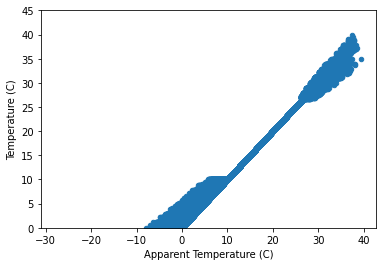

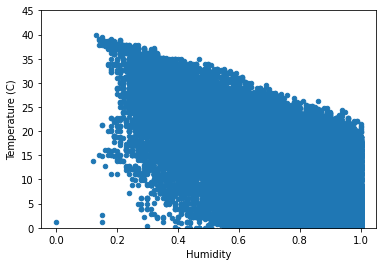

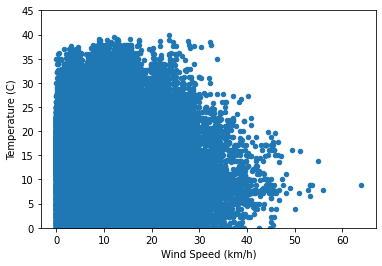

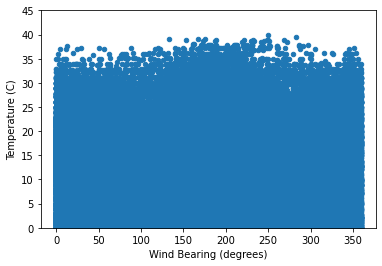

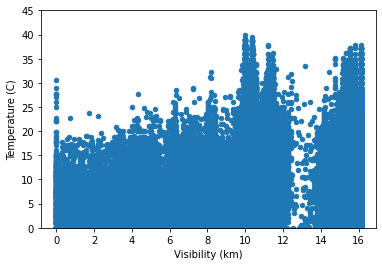

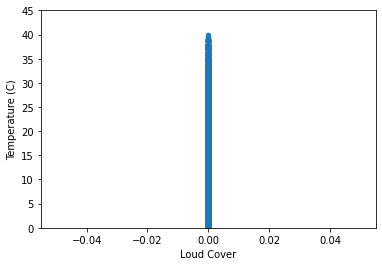

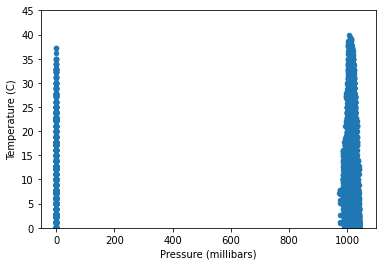

In [117]:
for i in numeric_col[1::]:

  data = pd.concat([df['Temperature (C)'], df[i]], axis=1)
  data.plot.scatter(x=i, y='Temperature (C)', ylim=(0,45))

In [118]:
df = df.drop('Loud Cover', axis=1)

## Relationship with categorical features



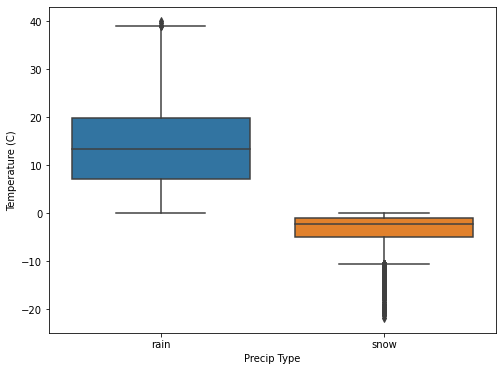

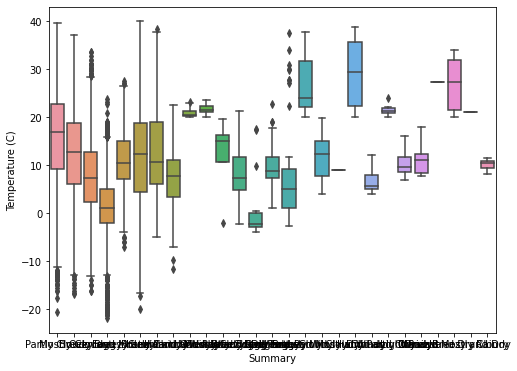

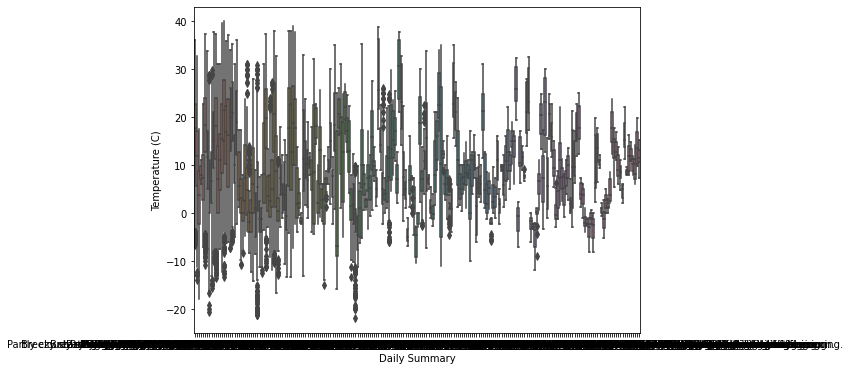

In [119]:
var = 'Precip Type'
data = pd.concat([df['Temperature (C)'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="Temperature (C)", data=data)


var = 'Summary'
data = pd.concat([df['Temperature (C)'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="Temperature (C)", data=data)


var = 'Daily Summary'
data = pd.concat([df['Temperature (C)'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="Temperature (C)", data=data)

## Correlation matrix (heatmap style)

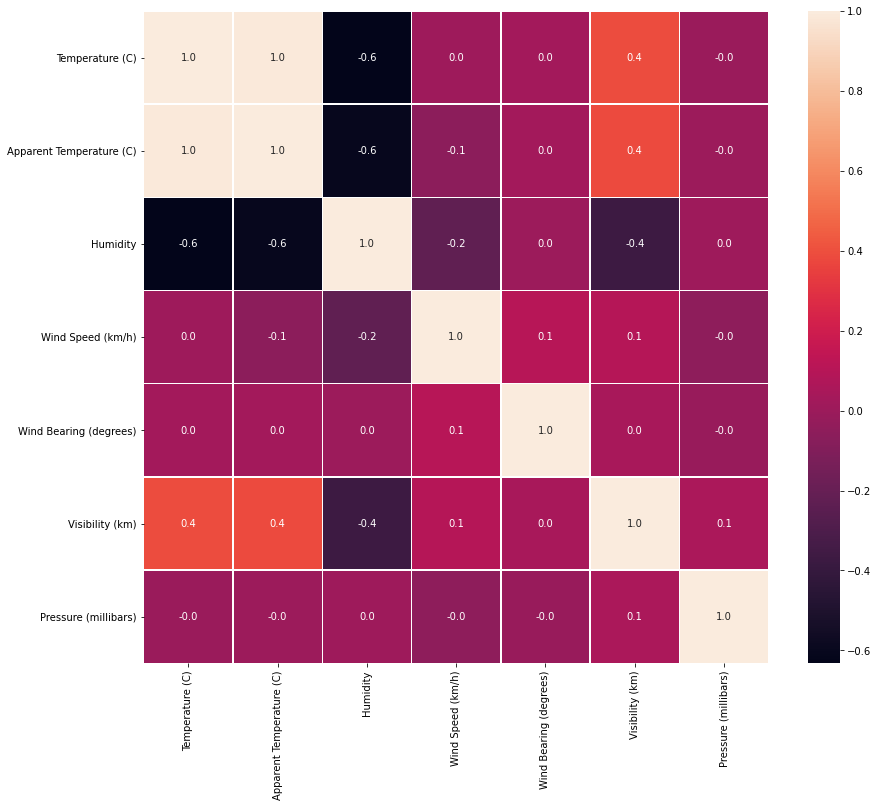

In [120]:
f,ax = plt.subplots(figsize=(14,12))
sns.heatmap(df.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()

## Visualising Count Plots and Unique Values of categorical Features

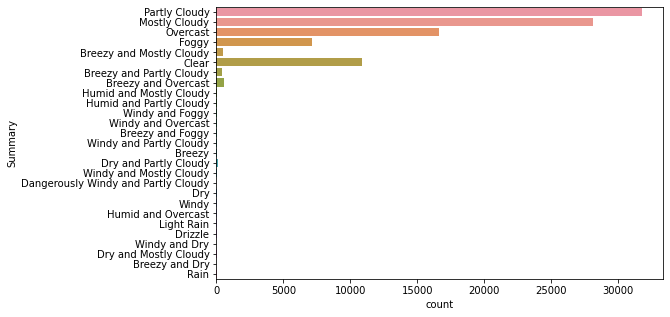

In [121]:
rcParams['figure.figsize'] = 8, 5
sns.countplot(y=df['Summary'])

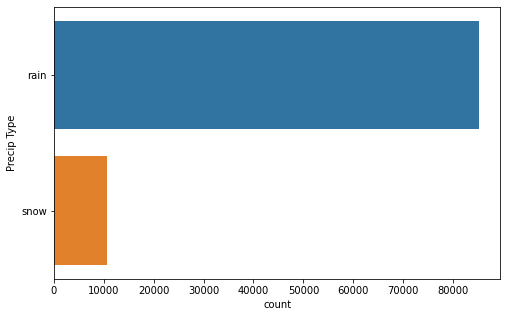

In [122]:
rcParams['figure.figsize'] = 8, 5
sns.countplot(y=df['Precip Type'])

In [123]:
data['Daily Summary'].value_counts(dropna=False)

Mostly cloudy throughout the day.                                                                20085
Partly cloudy throughout the day.                                                                 9981
Partly cloudy until night.                                                                        6169
Partly cloudy starting in the morning.                                                            5184
Foggy in the morning.                                                                             4201
                                                                                                 ...  
Breezy in the morning and mostly cloudy starting in the morning.                                    24
Mostly cloudy throughout the day and breezy starting overnight continuing until afternoon.          24
Breezy starting overnight continuing until morning and partly cloudy starting in the morning.       24
Partly cloudy until night and breezy in the afternoon.                   

Through the obversations we have noticed that only Humidity and Visiblity (KM) would be useful for prediction

In [124]:
df = df[['Humidity', 'Visibility (km)', 'Temperature (C)']]

## Missing Values

In [125]:
for i in df.columns:
  df[i] = df[i].interpolate(method='linear')

We can use Linear Interpolation. It's a technique use to handle the missing value in Numerical variables because Linear interpolation is an imputation technique that assumes a linear relationship between data points and utilizes non-missing values from adjacent data points to compute a value for a missing data point.

## Outliers

### Finding Outliers and Removing Outliers

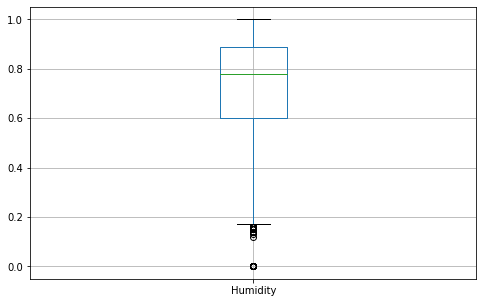

In [126]:
boxplot = df.boxplot(column=['Humidity'])

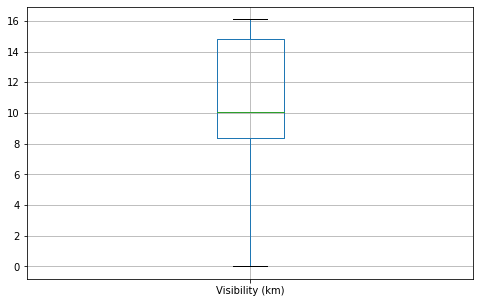

In [127]:
boxplot = df.boxplot(column=['Visibility (km)'])

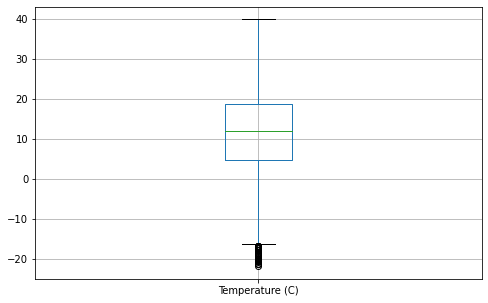

In [128]:
boxplot = df.boxplot(column=['Temperature (C)'])

In [129]:
# find outliers for Humidity

IQR = df.Humidity.quantile(0.75) - df.Humidity.quantile(0.25)
Lower_fence = df.Humidity.quantile(0.25) - (IQR * 3)
Upper_fence = df.Humidity.quantile(0.75) + (IQR * 3)
print('Humidity outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

Humidity outliers are values < -0.27000000000000013 or > 1.7600000000000002


In [130]:
# find outliers for Visibility (km)

IQR = df['Visibility (km)'].quantile(0.75) - df['Visibility (km)'].quantile(0.25)
Lower_fence = df['Visibility (km)'].quantile(0.25) - (IQR * 3)
Upper_fence = df['Visibility (km)'].quantile(0.75) + (IQR * 3)
print('Visibility (km) outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

Visibility (km) outliers are values < -11.076800000000002 or > 34.2286


In [131]:
# find outliers for Temperature (C)

IQR = df['Temperature (C)'].quantile(0.75) - df['Temperature (C)'].quantile(0.25)
Lower_fence = df['Temperature (C)'].quantile(0.25) - (IQR * 3)
Upper_fence = df['Temperature (C)'].quantile(0.75) + (IQR * 3)
print('Temperature (C) outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

Temperature (C) outliers are values < -37.761111111111134 or > 61.288888888888906


In [132]:
df[(np.abs(stats.zscore(df['Humidity'])) < 3)]
df[(np.abs(stats.zscore(df['Visibility (km)'])) < 3)]
df[(np.abs(stats.zscore(df['Temperature (C)'])) < 3)]

,Humidity,Visibility (km),Temperature (C)
0,0.89,15.8263,9.472222
1,0.86,15.8263,9.355556
2,0.89,14.9569,9.377778
3,0.83,15.8263,8.288889
4,0.83,15.8263,8.755556
...,...,...,...
96448,0.43,16.1000,26.016667
96449,0.48,15.5526,24.583333
96450,0.56,16.1000,22.038889
96451,0.60,16.1000,21.522222


# Model Building

In [134]:
X = df.drop('Temperature (C)', axis = 1)
y = df['Temperature (C)']   

### Splitting whole data into train and test

In [135]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

### Using StandardScalar to normalise the dataset

In [136]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Creating variable df_train for SGD

In [137]:
df_train=pd.DataFrame(X_train)
df_train['Temperature (C)']=y_train
df_train.head()

,0,1,Temperature (C)
0,0.945371,-1.673996,NaN
1,0.229145,0.171629,NaN
2,-2.277644,-0.090380,9.377778
3,1.150007,-1.396575,NaN
4,0.126827,1.100222,NaN


### SGD implementation for linear regression

In [138]:
'''
#intialise W and B to zero
Set the number of Interation, learning rate and batch size
'''

W , B, iteration, lr_rate, k = np.zeros(shape=(1,2)),0,750,0.01,25 


while iteration >= 0:

    w, b, temp_vectors, temp_intercept = W, B, np.zeros(shape=(1,2)),0 #Update W and B and set temporary terms to zero
    data = df.sample(k) # sampling random k=batch  data
    x = np.array(data.drop('Temperature (C)', axis = 1))
    y = np.array(data['Temperature (C)'])
    
    for i in range(k):
        temp_vectors += (-2)*x[i]*(y[i]-(np.dot(w,x[i])+b)) # partial differentiation with respect to w dl/dw=1/k(-2x)*(y-wTx-b)
        temp_intercept += (-2)*(y[i]-(np.dot(w,x[i])+b)) # partial differentiation with respect to b(intercept) dl/db=1/k(-2)*(y-wTx-b)
        
    W = (w-lr_rate*(temp_vectors)/k) # Updating the value of W after taking average of all it's partial differentiation
    B = (b-lr_rate*(temp_intercept)/k) # Updating the value of b(intercept) after taking average of all it's partial differentiation
    
    iteration-=1
    
    
print(W)
print(B)

[[4.93793481e+125 1.17724221e+127]]
[8.1784071e+125]


### Prediction on x_test

In [139]:
y_pred = []

for i in range(len(X_test)):
    val = np.dot(W, X_test[i])+B  #val= wTx+b
    y_pred.append(np.asscalar(val))

### Plotting

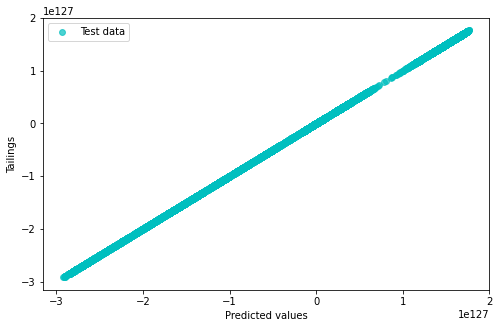

In [145]:
plt.scatter(y_pred, y_pred - y_test,
          c = 'c', marker = 'o', s = 35, alpha = 0.7,
          label = 'Test data')

plt.xlabel('Predicted values')
plt.ylabel('Tailings')
plt.legend(loc = 'upper left')
plt.hlines(y = 0, xmin = 0, xmax = 60000, lw = 2, color = 'red')
plt.show()

### Checking accuracy

In [148]:
MSE = mean_squared_error(y_test, y_pred)
print('mean squared error =',MSE)

mean squared error = 1.3791944453494296e+254
